# 1- Import Libs 

In [107]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arabic_reshaper
from whatstk import FigureBuilder
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly
from wordcloud import WordCloud
from urlextract import URLExtract
from collections import Counter
import emojis
from whatstk import WhatsAppChat


# 2-Load Backup Chat

In [108]:
chat = WhatsAppChat.from_source(filepath='/content/whatsapp chat.txt', hformat='[%y-%m-%d %H:%M] %name:')
chat.df.head(5)

,date,username,message
0,2019-04-16 02:09:00,+1 123 456 789,Et labore proident laboris do labore ex.
1,2019-04-16 03:01:00,Mary,Reprehenderit id aute consectetur aliquip nost...
2,2019-04-17 12:56:00,John,Amet magna officia ullamco pariatur ipsum cupi...
3,2019-04-17 13:30:00,Mary,"Cillum aute et cupidatat ipsum, occaecat lorem..."
4,2019-04-17 15:09:00,John,"Eiusmod irure laboris dolore anim, velit velit..."


In [109]:
chat.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2000 non-null   datetime64[ns]
 1   username  2000 non-null   string        
 2   message   2000 non-null   string        
dtypes: datetime64[ns](1), string(2)
memory usage: 47.0 KB


In [110]:
chat.df.describe().T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last
date,2000,2000,2019-04-16 02:09:00,1,2019-04-16 02:09:00,2020-06-13
username,2000,4,Giuseppe,516,NaT,NaT
message,2000,2000,Et labore proident laboris do labore ex.,1,NaT,NaT


# 3- Make a relation between users and their messages as a percent value

In [111]:
User_Percent=round((chat.df['username'].value_counts()/chat.df.shape[0])*100,2).reset_index().rename(columns={'index' : 'name', 'username' : 'precent'})
User_Percent

,name,precent
0,Giuseppe,25.8
1,+1 123 456 789,25.35
2,Mary,24.8
3,John,24.05


In [116]:
fig = px.pie(User_Percent, values='precent', names='name', title='Percentage of Messages to Users',
             color_discrete_sequence=px.colors.sequential.Darkmint)
fig.show()

# 4- explore data to know more details

In [11]:
chat.df.groupby('username').agg('count')

,date,message
username,,
+1 123 456 789,507,507
Giuseppe,516,516
John,481,481
Mary,496,496


In [86]:
chat.df.groupby(chat.df.date).agg(num_messages=('message', 'count')).sort_values(by='num_messages', ascending=False)

,num_messages
date,
2019-04-16 02:09:00,1
2019-12-02 12:22:00,1
2019-12-09 14:25:00,1
2019-12-09 10:47:00,1
2019-12-09 09:50:00,1
...,...
2019-07-29 02:15:00,1
2019-07-29 01:38:00,1
2019-07-29 01:05:00,1


# 5- check if there any url in message

In [95]:
extractor = URLExtract()
for i in chat.df.message:
  urls = extractor.find_urls(i)
urls

[]

# 6 -Visualization

In [94]:
fb = FigureBuilder(chat=chat)
fig = fb.user_interventions_count_linechart(cumulative=True, title='User inteventions count (cumulative)')
fig

In [18]:
fig2 = fb.user_interventions_count_linechart(cumulative=True, msg_length=True, title='Count of sent characters (cumulative)')
fig2

In [19]:
fig3 = fb.user_msg_length_boxplot()
fig3

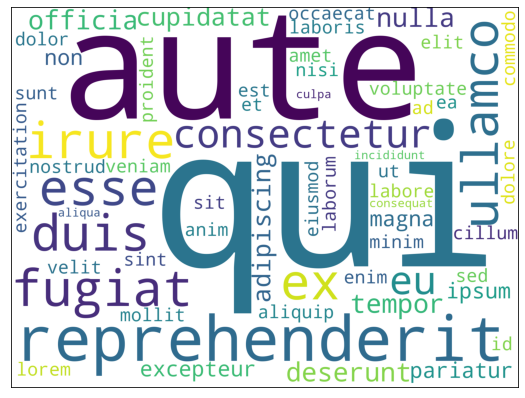

In [40]:
plt.figure(figsize=(20,7))
text = chat.df['message'].str.cat(sep=" ")
text = arabic_reshaper.reshape(text)
wc = WordCloud(width=2000, height=1500, min_font_size=20, background_color='white')
df_wc = wc.generate(text)
plt.xticks([])
plt.yticks([])
plt.imshow(df_wc)

In [56]:
#extraxt most used emoji in chat
emoji_msg = []
for message in chat.df['message']:
    emoji_msg.extend(emojis.get(message))
len(emoji_msg)

1051

In [57]:
emojis_df = pd.DataFrame(Counter(emoji_msg).most_common(len(emoji_msg)), columns=['Emoji', 'Count']).head()
emojis_df

,Emoji,Count
0,♀️,82
1,♂️,56
2,👨,30
3,👩,28
4,🧛,13


In [105]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=emojis_df['Emoji'],
                x=emojis_df['Count'],
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emojis_df['Emoji'],
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=30),
                ))

fig.update_yaxes(visible =False, range=[0, len(emojis_df)+1])
fig.update_xaxes(title='Number of Times Used')

fig.update_layout(
    template='simple_white', 
    height=len(emojis_df)*75, width = 800)

In [75]:
#separate dates
chat.df['year'] = chat.df['date'].dt.year
chat.df['month'] = chat.df['date'].dt.month
chat.df['day'] = chat.df['date'].dt.day
chat.df['hour'] = chat.df['date'].dt.hour

In [65]:
timeline = chat.df.groupby(['year', 'month', 'day']).count()['message'].reset_index()
timeline

,year,month,day,message
0,2019,4,16,2
1,2019,4,17,9
2,2019,4,18,1
3,2019,4,21,8
4,2019,4,25,10
...,...,...,...,...
230,2020,6,9,15
231,2020,6,10,6
232,2020,6,11,1
233,2020,6,12,14


In [67]:
time=[]
for i in range(timeline.shape[0]):
    time.append(str(timeline['month'][i]) + '-' + str(timeline['year'][i]))
time

['4-2019',
 '4-2019',
 '4-2019',
 '4-2019',
 '4-2019',
 '4-2019',
 '4-2019',
 '4-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '5-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '6-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '7-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',
 '8-2019',

In [68]:
timeline['time'] = time
timeline

,year,month,day,message,time
0,2019,4,16,2,4-2019
1,2019,4,17,9,4-2019
2,2019,4,18,1,4-2019
3,2019,4,21,8,4-2019
4,2019,4,25,10,4-2019
...,...,...,...,...,...
230,2020,6,9,15,6-2020
231,2020,6,10,6,6-2020
232,2020,6,11,1,6-2020
233,2020,6,12,14,6-2020


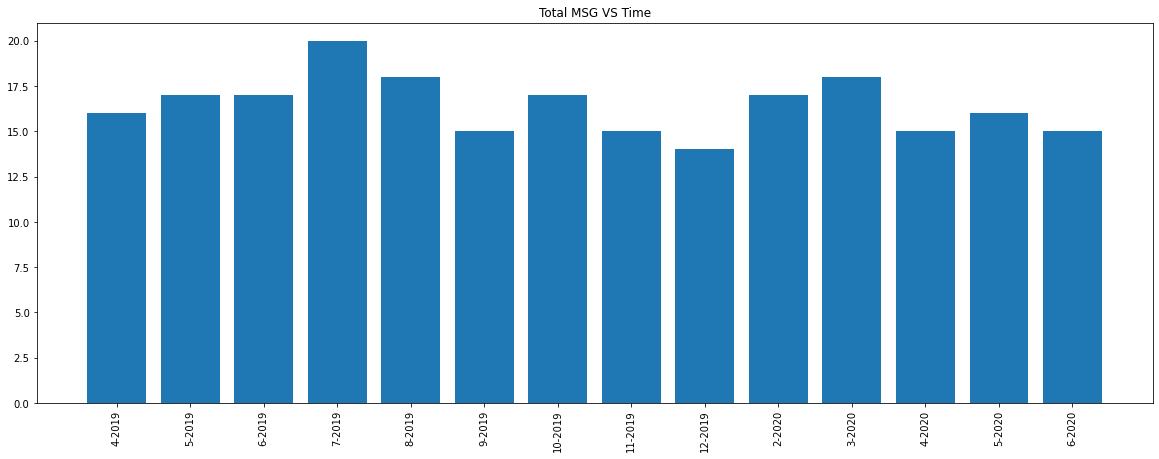

In [74]:
plt.figure(figsize=(20,7))
plt.bar(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.title("Total MSG VS Time")
plt.show()

In [77]:
most_hours = chat.df.groupby('hour').count()['message'].reset_index()
most_hours

,hour,message
0,0,82
1,1,104
2,2,97
3,3,82
4,4,82
5,5,78
6,6,82
7,7,72
8,8,81
9,9,71


In [80]:
most_hours.replace(to_replace=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],value=['0 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM'],inplace=True)
most_hours.replace(to_replace=[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],value=['12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'],inplace=True)
most_hours.head()

,hour,message
0,0AM,82
1,1AM,104
2,2AM,97
3,3AM,82
4,4AM,82


In [83]:
am = most_hours.iloc[0:12]
pm = most_hours.iloc[12:24]

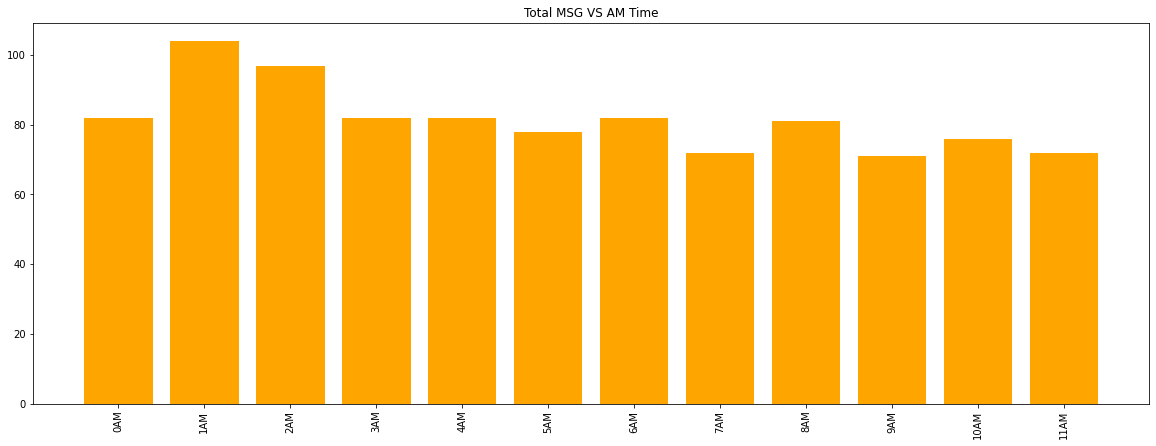

In [87]:
plt.figure(figsize=(20,7))
plt.bar(am['hour'], am['message'], color='orange')
plt.title("Total MSG VS AM Time")
plt.xticks(rotation='vertical');

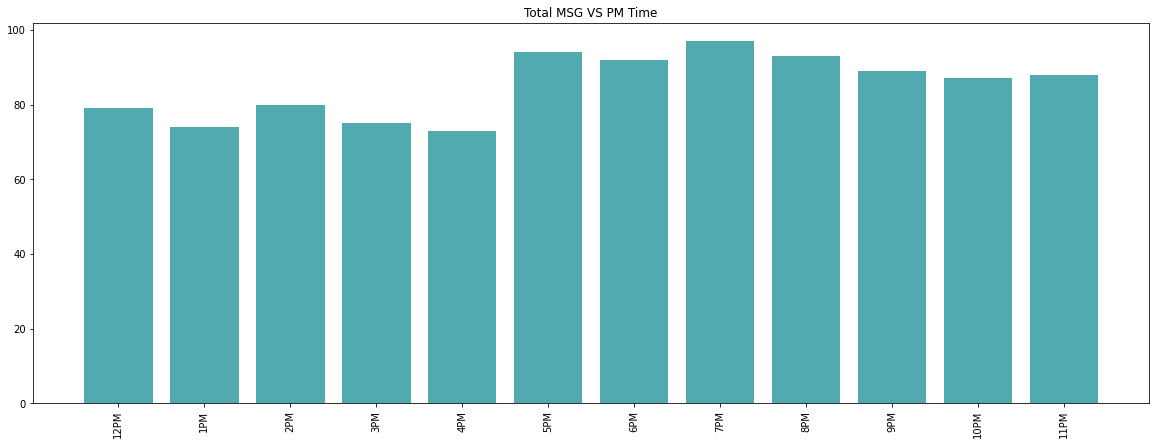

In [88]:
plt.figure(figsize=(20,7))
plt.bar(pm['hour'], pm['message'], color='#50AAB0')
plt.title("Total MSG VS PM Time")
plt.xticks(rotation='vertical');